## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Import train Data 

In [285]:

credit = pd.read_csv('train_s3TEQDk.csv')
credit.tail(3)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0
245724,BOCZSWLJ,Male,29,RG269,Salaried,X1,21,No,1129276,No,0


###  Import module or subpackage <a class="anchor" id="1.5"></a>

In [8]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix

In [9]:
###  Selection data from DataFrame (Pandas Tips)<a class="anchor" id="2.8"></a>

In [286]:
df = credit.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [287]:
# df.loc[], df.iloc
df.iloc[2:5, :].loc[:, "ID":"Region_Code"]

,ID,Gender,Age,Region_Code
2,HD3DSEMC,Female,56,RG268
3,BF3NC7KV,Male,34,RG270
4,TEASRWXV,Female,30,RG282


In [22]:
# Select multiple slices of columns from a df
cols_str = list(map(str, list(df.columns))) # so that we can do df["0"] as string for the example
df.columns = cols_str


# please ntoe that df.columns is a series with index, so we are using index to filter #
display(df[list(df.columns[0:3]) + list(df.columns[4:7])].head(3))

# Using numpy
display(df.iloc[:, np.r_[0:3, 4:7]].head(3)) # probably the most beautiful solution

,ID,Gender,Age,Occupation,Channel_Code,Vintage
0,NNVBBKZB,Female,73,Other,X3,43
1,IDD62UNG,Female,30,Salaried,X1,32
2,HD3DSEMC,Female,56,Self_Employed,X3,26


,ID,Gender,Age,Occupation,Channel_Code,Vintage
0,NNVBBKZB,Female,73,Other,X3,43
1,IDD62UNG,Female,30,Salaried,X1,32
2,HD3DSEMC,Female,56,Self_Employed,X3,26


In [23]:
import gc
del df_all
gc.collect()

280

 ## EDA & Data cleaning<a class="anchor" id="4"></a>

In [78]:

df.describe()

,Gender,Vintage,Avg_Account_Balance,Is_Active
count,245725.000000,245725.000000,2.457250e+05,245725.0
mean,0.546127,46.959141,1.128403e+06,1.0
std,0.497869,32.353136,8.529364e+05,0.0
min,0.000000,7.000000,2.079000e+04,1.0
25%,0.000000,20.000000,6.043100e+05,1.0
50%,1.000000,32.000000,8.946010e+05,1.0
75%,1.000000,73.000000,1.366666e+06,1.0
max,1.000000,135.000000,1.035201e+07,1.0


Vintage


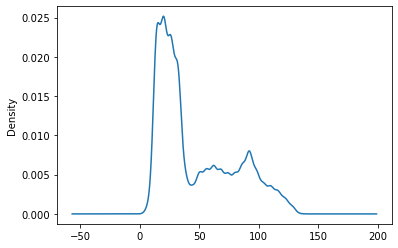

In [92]:
print(str(coln[6]))
df[coln[6]].plot.kde()


Avg_Account_Balance


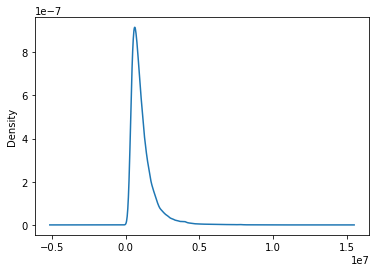

In [93]:
print(str(coln[8]))

df[coln[8]].plot.kde()


### Count of rows that match a condition <a class="anchor" id="4.1"></a>

In [97]:
df = credit.copy()
df.head()
df.shape

# absolute values
(df["Age"] < 65).sum()
print("In the columns Age we have {} of rows that are below ".format((df["Age"] < 35).sum()))

# mean value
(df["Age"] < 65).mean()
print("In the columns Age the values that are below 35 represent {}%".format((df["Age"] < 35).mean()))

print("In the columns Age we have {} of rows that are below ".format((df["Age"] < 55).sum()))

print("In the columns Age the values that are below 55 represent {}%".format((df["Age"] < 55).mean()))


print("In the columns Vintage we have {} of rows that are below ".format((df["Vintage"] < 55).sum()))

print("In the columns Vintage the values that are below 55 represent {}%".format((df["Vintage"] < 55).mean()))

In the columns Age we have 92062 of rows that are below 
In the columns Age the values that are below 35 represent 0.3746545935496999%
In the columns Age we have 188164 of rows that are below 
In the columns Age the values that are below 55 represent 0.7657503306541866%
In the columns Vintage we have 156357 of rows that are below 
In the columns Vintage the values that are below 55 represent 0.6363088818801506%


In [35]:
print("In the columns Vintage we have {} of rows that are below ".format((df["Vintage"] < 55).sum()))

print("In the columns Vintage the values that are below 55 represent {}%".format((df["Vintage"] < 55).mean()))

In the columns Vintage we have 156357 of rows that are below 
In the columns Vintage the values that are below 55 represent 0.6363088818801506%


### Combine the small categories into a single category named "Other"

In [98]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [288]:
df = credit.copy()

def freq_count_catag(col):
    # Step 1: count the frequencies
    df[col] = df[col].astype("category")
    frequencies = df[col].value_counts(normalize = True)
    print(col)
    print(df[col].cat.categories)
    print("---------------------------------")

    print(frequencies)

    # Step 2: establish your threshold and filter the smaller categories
    threshold = 0.1
    small_categories = frequencies[frequencies < threshold].index
    print("Smaller categories with less than 10% ocurances")

    print(small_categories)
    print("########################################")
    
freq_count_catag("Occupation")
freq_count_catag("Channel_Code")
freq_count_catag("Region_Code")
freq_count_catag("Credit_Product")
freq_count_catag("Is_Active")

Occupation
Index(['Entrepreneur', 'Other', 'Salaried', 'Self_Employed'], dtype='object')
---------------------------------
Self_Employed    0.410565
Salaried         0.293006
Other            0.285575
Entrepreneur     0.010854
Name: Occupation, dtype: float64
Smaller categories with less than 10% ocurances
CategoricalIndex(['Entrepreneur'], categories=['Entrepreneur', 'Other', 'Salaried', 'Self_Employed'], ordered=False, dtype='category')
########################################
Channel_Code
Index(['X1', 'X2', 'X3', 'X4'], dtype='object')
---------------------------------
X1    0.422090
X3    0.279630
X2    0.275617
X4    0.022664
Name: Channel_Code, dtype: float64
Smaller categories with less than 10% ocurances
CategoricalIndex(['X4'], categories=['X1', 'X2', 'X3', 'X4'], ordered=False, dtype='category')
########################################
Region_Code
Index(['RG250', 'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257',
       'RG258', 'RG259', 'RG260', 'RG261', 'RG262',

In [289]:

Reg_top9=[x for x in df.Region_Code.value_counts().sort_values(ascending=False).head(7).index]

In [290]:
Reg_top9

['RG268', 'RG283', 'RG254', 'RG284', 'RG277', 'RG280', 'RG269']

In [291]:

for label in Reg_top9:
    df[label]=np.where(df["Region_Code"]==label, 1, 0)
    
df[["Region_Code"]+Reg_top9].head(10)

,Region_Code,RG268,RG283,RG254,RG284,RG277,RG280,RG269
0,RG268,1,0,0,0,0,0,0
1,RG277,0,0,0,0,1,0,0
2,RG268,1,0,0,0,0,0,0
3,RG270,0,0,0,0,0,0,0
4,RG282,0,0,0,0,0,0,0
5,RG261,0,0,0,0,0,0,0
6,RG282,0,0,0,0,0,0,0
7,RG265,0,0,0,0,0,0,0
8,RG283,0,1,0,0,0,0,0
9,RG268,1,0,0,0,0,0,0


In [292]:
Xcat=[x for x in df.Channel_Code.value_counts().sort_values(ascending=False).head(3).index]
print(Xcat)
for label in Xcat:
    df[label]=np.where(df["Channel_Code"]==label, 1, 0)
    
df[["Channel_Code"]+Xcat].head(10)

['X1', 'X3', 'X2']


,Channel_Code,X1,X3,X2
0,X3,0,1,0
1,X1,1,0,0
2,X3,0,1,0
3,X1,1,0,0
4,X1,1,0,0
5,X1,1,0,0
6,X3,0,1,0
7,X3,0,1,0
8,X2,0,0,1
9,X2,0,0,1


In [293]:
freq_count_catag("Is_Lead")

Is_Lead
Int64Index([0, 1], dtype='int64')
---------------------------------
0    0.762792
1    0.237208
Name: Is_Lead, dtype: float64
Smaller categories with less than 10% ocurances
CategoricalIndex([], categories=[0, 1], ordered=False, dtype='category')
########################################


###  Count the missing values 

In [101]:
print('Total Nan in all clolumns')
print(df.isnull().sum().sum(), "\n\n")

# Solution 2
print('Column wise nan')
print(df.isna().sum(), "\n\n")

# Solution 3
print('df.isna().any()\n')
print(df.isna().any(), "\n\n")

# Solution 4:
df.isna().any(axis = None)

Total Nan in all clolumns
29325 


Column wise nan
ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64 


df.isna().any()

ID                     False
Gender                 False
Age                    False
Region_Code            False
Occupation             False
Channel_Code           False
Vintage                False
Credit_Product          True
Avg_Account_Balance    False
Is_Active              False
Is_Lead                False
dtype: bool 




True

## Count the Number of NAN in test data set

In [46]:
credit_test = pd.read_csv('test_mSzZ8RL.csv')
print(df.isna().any(), "\n\n")
print(credit_test.isna().sum(), "\n\n")
# Solution 4:
credit_test.isna().any(axis = None)

ID                     False
Gender                 False
Age                    False
Region_Code            False
Occupation             False
Channel_Code           False
Vintage                False
Credit_Product          True
Avg_Account_Balance    False
Is_Active              False
Is_Lead                False
dtype: bool 


ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64 




True

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   245725 non-null  object  
 1   Gender               245725 non-null  int64   
 2   Age                  245725 non-null  int64   
 3   Region_Code          245725 non-null  category
 4   Occupation           245725 non-null  category
 5   Channel_Code         245725 non-null  category
 6   Vintage              245725 non-null  int64   
 7   Credit_Product       216400 non-null  category
 8   Avg_Account_Balance  245725 non-null  int64   
 9   Is_Active            245725 non-null  category
 10  Is_Lead              245725 non-null  category
 11  RG268                245725 non-null  int32   
 12  RG283                245725 non-null  int32   
 13  RG254                245725 non-null  int32   
 14  RG284                245725 non-null  int32   
 15  

## Convert one type of values to others <a class="anchor" id="4.4"></a>

In [295]:

df["Gender"] = df["Gender"].map({"Male":1, "Female":0}) # using dictionaries to map values
df["Occupation"] = df["Occupation"].map({'Other':0, 'Salaried':1, 'Self_Employed':2,'Entrepreneur':3}) # 'Other':0, 'Salaried':1, 'Self_Employed':2,'Entrepreneur':3, 
df["Credit_Product"] = df["Credit_Product"].map({"Yes":1, "No":0}) # using dictionaries to map values
df["Is_Active"] = df["Is_Active"].map({"Yes":1, "No":0}) # using 


In [299]:

for i in ["Occupation","Is_Active"]:
        df_nan_train[i] = df_nan_train[i].astype('int')
        df_nan_test[i] = df_nan_test[i].astype('int')

<ipython-input-299-139fd945b335>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan_train[i] = df_nan_train[i].astype('int')
<ipython-input-299-139fd945b335>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan_test[i] = df_nan_test[i].astype('int')


### check the dependency of Credit_Product with other fetures and then perform Machine  learning algorithm to fill other nan values of Credit_Product column

In [300]:
df_nan_test=df[df.isna().any(axis=1)]# data with nan into test set

In [301]:

df_nan_train=df.dropna(axis=0)#data with out nan as train set

In [304]:
df_nan_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216400 entries, 0 to 245724
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   216400 non-null  object  
 1   Gender               216400 non-null  int64   
 2   Age                  216400 non-null  int64   
 3   Region_Code          216400 non-null  category
 4   Occupation           216400 non-null  int32   
 5   Channel_Code         216400 non-null  category
 6   Vintage              216400 non-null  int64   
 7   Credit_Product       216400 non-null  category
 8   Avg_Account_Balance  216400 non-null  int64   
 9   Is_Active            216400 non-null  int32   
 10  Is_Lead              216400 non-null  category
 11  RG268                216400 non-null  int32   
 12  RG283                216400 non-null  int32   
 13  RG254                216400 non-null  int32   
 14  RG284                216400 non-null  int32   
 15  

In [303]:

for i in ["Occupation","Is_Active"]:
        df_nan_train[i] = df_nan_train[i].astype('int')
        df_nan_test[i] = df_nan_test[i].astype('int')

<ipython-input-303-139fd945b335>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan_train[i] = df_nan_train[i].astype('int')
<ipython-input-303-139fd945b335>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan_test[i] = df_nan_test[i].astype('int')


### Applying Random forest classification algorithm to immpute nan values in Credit_Product column in dataset  

In [305]:
y = df_nan_train.iloc[:, 7].values
xx=df_nan_train.drop(["ID","Credit_Product","Region_Code","Channel_Code","Is_Lead"],axis=1)
X = xx.iloc[:, :].values

In [306]:
y=y.astype('int')

### Splitting the dataset into the Training set and Test set

In [308]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Training the Random Forest Classification model on the Training set


In [309]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting a new result


## Predicting the Test set results

In [310]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 0]
 [0 0]
 [0 1]]


## Making the Confusion Matrix of imputation model

In [311]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[29997  6082]
 [10785  7236]]


0.6882255083179297

In [212]:
df_nan_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29325 entries, 6 to 245720
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               29325 non-null  int64   
 1   Age                  29325 non-null  int32   
 2   Region_Code          29325 non-null  category
 3   Occupation           29325 non-null  int32   
 4   Channel_Code         29325 non-null  category
 5   Vintage              29325 non-null  int64   
 6   Credit_Product       0 non-null      category
 7   Avg_Account_Balance  29325 non-null  int64   
 8   Is_Active            29325 non-null  int32   
 9   RG268                29325 non-null  int32   
 10  RG283                29325 non-null  int32   
 11  RG254                29325 non-null  int32   
 12  RG284                29325 non-null  int32   
 13  RG277                29325 non-null  int32   
 14  RG280                29325 non-null  int32   
 15  RG269             

In [312]:

X_testset1=df_nan_test.drop(["ID","Credit_Product","Region_Code","Channel_Code","Is_Lead"],axis=1)
X_testset= X_testset1.iloc[:, :].values

In [313]:
y_tset_pred = classifier.predict(X_testset)

### concatenate train and test data after appending y predicted data for Credit_Product

In [314]:
df_nan_test["Credit_Product"]=y_tset_pred

<ipython-input-314-b40c4de97cbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan_test["Credit_Product"]=y_tset_pred


In [315]:
df_nan_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29325 entries, 6 to 245720
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   29325 non-null  object  
 1   Gender               29325 non-null  int64   
 2   Age                  29325 non-null  int64   
 3   Region_Code          29325 non-null  category
 4   Occupation           29325 non-null  int32   
 5   Channel_Code         29325 non-null  category
 6   Vintage              29325 non-null  int64   
 7   Credit_Product       29325 non-null  int32   
 8   Avg_Account_Balance  29325 non-null  int64   
 9   Is_Active            29325 non-null  int32   
 10  Is_Lead              29325 non-null  category
 11  RG268                29325 non-null  int32   
 12  RG283                29325 non-null  int32   
 13  RG254                29325 non-null  int32   
 14  RG284                29325 non-null  int32   
 15  RG277             

In [316]:
finaldf=pd.concat([df_nan_train, df_nan_test])
finaldf

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,...,RG268,RG283,RG254,RG284,RG277,RG280,RG269,X1,X3,X2
0,NNVBBKZB,0,73,RG268,0,X3,43,0,1045696,0,...,1,0,0,0,0,0,0,0,1,0
1,IDD62UNG,0,30,RG277,1,X1,32,0,581988,0,...,0,0,0,0,1,0,0,1,0,0
2,HD3DSEMC,0,56,RG268,2,X3,26,0,1484315,1,...,1,0,0,0,0,0,0,0,1,0
3,BF3NC7KV,1,34,RG270,1,X1,19,0,470454,0,...,0,0,0,0,0,0,0,1,0,0
4,TEASRWXV,0,30,RG282,1,X1,33,0,886787,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245684,WVJFPREY,0,51,RG281,3,X3,99,1,552992,0,...,0,0,0,0,0,0,0,0,1,0
245694,WIZBXYQZ,0,50,RG277,2,X2,92,0,1385124,0,...,0,0,0,0,1,0,0,0,0,1
245699,MARTXU7T,1,53,RG254,0,X2,19,0,1141825,1,...,0,0,1,0,0,0,0,0,0,1
245714,KSCFGXV3,0,46,RG268,2,X2,19,1,993195,0,...,1,0,0,0,0,0,0,0,0,1


In [329]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245725 entries, 0 to 245720
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   245725 non-null  object  
 1   Gender               245725 non-null  int64   
 2   Age                  245725 non-null  int64   
 3   Region_Code          245725 non-null  category
 4   Occupation           245725 non-null  int32   
 5   Channel_Code         245725 non-null  category
 6   Vintage              245725 non-null  int64   
 7   Credit_Product       245725 non-null  int64   
 8   Avg_Account_Balance  245725 non-null  int64   
 9   Is_Active            245725 non-null  int32   
 10  Is_Lead              245725 non-null  category
 11  RG268                245725 non-null  int32   
 12  RG283                245725 non-null  int32   
 13  RG254                245725 non-null  int32   
 14  RG284                245725 non-null  int32   
 15  

###  Final classification using Random forest method after EDA
### Choose Is_Lead as target and model

In [342]:
fdf=finaldf.copy()

In [343]:
#fdf=finaldf.copy()
y1 = fdf.iloc[:, 10].values  # Is lead target
xx1=fdf.drop(["ID","Region_Code","Channel_Code","Is_Lead"],axis=1)

X1 = xx1.iloc[:, :].values
y1=y1.astype('int')



X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.25, random_state = 0)


classifier_final = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_final.fit(X_train, y_train)

y_pred = classifier_final.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0]
 [1 0]
 [1 0]
 ...
 [0 0]
 [1 1]
 [0 0]]
[[42688  4181]
 [ 9871  4692]]


0.7712592785518948

### Classification report<a class="anchor" id="6.4"></a>

In [344]:
from sklearn.metrics import classification_report
def classification_report_print(y_true, y_pred, title, target_names=['0', '1']):
    print(f'Classification report {title}:')
    print(classification_report(y_true, y_pred, target_names=target_names))
    

In [345]:
classification_report_print(y_test, y_pred, 'for training data')


Classification report for training data:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     46869
           1       0.53      0.32      0.40     14563

    accuracy                           0.77     61432
   macro avg       0.67      0.62      0.63     61432
weighted avg       0.75      0.77      0.75     61432



In [349]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_pred, classifier_final.predict_proba(X_test)[:, 1])


1.0

In [335]:
X_test.shape

(61432, 17)

In [320]:
from sklearn.naive_bayes import GaussianNB
classifier_GB = GaussianNB()
classifier_GB.fit(X_train, y_train)

y_pred = classifier_GB.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]
[[46008   861]
 [14067   496]]


0.7569996093241308

### Predicting the data in test csv file after transformation using Random forest Algorithm with 77.12% accuracy

### Perform Encoding of catogorical variables

In [356]:
credit_test = pd.read_csv('test_mSzZ8RL.csv')
credit.tail(3)
df_test=credit_test
df_test.describe()


,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [357]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [358]:
print(df_test.isna().any(), "\n\n")
print(df_test.isna().sum(), "\n\n")
# Solution 4:
df_test.isna().any(axis = None)

ID                     False
Gender                 False
Age                    False
Region_Code            False
Occupation             False
Channel_Code           False
Vintage                False
Credit_Product          True
Avg_Account_Balance    False
Is_Active              False
dtype: bool 


ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64 




True

In [359]:
def freq_count_catag(col):
   
    # Step 1: count the frequencies
    df_test[col] = df_test[col].astype("category")
    frequencies = df_test[col].value_counts(normalize = True)
    print(col)
    print(df_test[col].cat.categories)
    print("---------------------------------")

    print(frequencies)

    # Step 2: establish your threshold and filter the smaller categories
    threshold = 0.1
    small_categories = frequencies[frequencies < threshold].index
    print("Smaller categories with less than 10% ocurances")

    print(small_categories)
    print("########################################")
    
freq_count_catag("Occupation")
freq_count_catag("Channel_Code")
freq_count_catag("Region_Code")
freq_count_catag("Credit_Product")
freq_count_catag("Is_Active")



Occupation
Index(['Entrepreneur', 'Other', 'Salaried', 'Self_Employed'], dtype='object')
---------------------------------
Self_Employed    0.410134
Salaried         0.293537
Other            0.286112
Entrepreneur     0.010217
Name: Occupation, dtype: float64
Smaller categories with less than 10% ocurances
CategoricalIndex(['Entrepreneur'], categories=['Entrepreneur', 'Other', 'Salaried', 'Self_Employed'], ordered=False, dtype='category')
########################################
Channel_Code
Index(['X1', 'X2', 'X3', 'X4'], dtype='object')
---------------------------------
X1    0.422402
X3    0.277927
X2    0.277043
X4    0.022628
Name: Channel_Code, dtype: float64
Smaller categories with less than 10% ocurances
CategoricalIndex(['X4'], categories=['X1', 'X2', 'X3', 'X4'], ordered=False, dtype='category')
########################################
Region_Code
Index(['RG250', 'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257',
       'RG258', 'RG259', 'RG260', 'RG261', 'RG262',

In [360]:
Reg_top9=[x for x in df_test.Region_Code.value_counts().sort_values(ascending=False).head(7).index]
for label in Reg_top9:
    df_test[label]=np.where(df_test["Region_Code"]==label, 1, 0)
    
df_test[["Region_Code"]+Reg_top9].head(10)



,Region_Code,RG268,RG283,RG254,RG284,RG277,RG280,RG270
0,RG254,0,0,1,0,0,0,0
1,RG268,1,0,0,0,0,0,0
2,RG270,0,0,0,0,0,0,1
3,RG272,0,0,0,0,0,0,0
4,RG270,0,0,0,0,0,0,1
5,RG268,1,0,0,0,0,0,0
6,RG253,0,0,0,0,0,0,0
7,RG257,0,0,0,0,0,0,0
8,RG284,0,0,0,1,0,0,0
9,RG283,0,1,0,0,0,0,0


In [361]:
print(df_test.isna().sum(), "\n\n")


ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
RG268                      0
RG283                      0
RG254                      0
RG284                      0
RG277                      0
RG280                      0
RG270                      0
dtype: int64 




In [362]:
Xcat=[x for x in df.Channel_Code.value_counts().sort_values(ascending=False).head(3).index]
print(Xcat)
for label in Xcat:
    df_test[label]=np.where(df_test["Channel_Code"]==label, 1, 0)
    

['X1', 'X3', 'X2']


In [363]:
df_test[["Channel_Code"]+Xcat].head(10)

,Channel_Code,X1,X3,X2
0,X1,1,0,0
1,X2,0,0,1
2,X1,1,0,0
3,X1,1,0,0
4,X1,1,0,0
5,X3,0,1,0
6,X2,0,0,1
7,X1,1,0,0
8,X3,0,1,0
9,X2,0,0,1


In [375]:
df_test.set_index('ID')

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,RG268,RG283,RG254,RG284,RG277,RG280,RG270,X1,X3,X2
ID,,,,,,,,,,,,,,,,,,,
VBENBARO,1,29,RG254,0,X1,25,1,742366,0,0,0,1,0,0,0,0,1,0,0
CCMEWNKY,1,43,RG268,0,X2,49,NaN,925537,0,1,0,0,0,0,0,0,0,0,1
VK3KGA9M,1,31,RG270,1,X1,14,0,215949,0,0,0,0,0,0,0,1,1,0,0
TT8RPZVC,1,29,RG272,0,X1,33,0,868070,0,0,0,0,0,0,0,0,1,0,0
SHQZEYTZ,0,29,RG270,0,X1,19,0,657087,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DBENJOYI,1,52,RG268,1,X2,86,1,4242558,1,1,0,0,0,0,0,0,0,0,1
CWQ72DWS,1,55,RG277,0,X2,86,1,1159153,0,0,0,0,0,1,0,0,0,0,1
HDESC8GU,1,35,RG254,1,X4,15,0,1703727,0,0,0,1,0,0,0,0,0,0,0


In [365]:

df_test["Gender"] = df_test["Gender"].map({"Male":1, "Female":0}) # using dictionaries to map values
df_test["Occupation"] = df_test["Occupation"].map({'Other':0, 'Salaried':1, 'Self_Employed':2,'Entrepreneur':3}) # 'Other':0, 'Salaried':1, 'Self_Employed':2,'Entrepreneur':3, 
df_test["Credit_Product"] = df_test["Credit_Product"].map({"Yes":1, "No":0}) # using dictionaries to map values
df_test["Is_Active"] = df_test["Is_Active"].map({"Yes":1, "No":0}) # using 


In [376]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   105312 non-null  object  
 1   Gender               105312 non-null  int64   
 2   Age                  105312 non-null  int64   
 3   Region_Code          105312 non-null  category
 4   Occupation           105312 non-null  category
 5   Channel_Code         105312 non-null  category
 6   Vintage              105312 non-null  int64   
 7   Credit_Product       92790 non-null   category
 8   Avg_Account_Balance  105312 non-null  int64   
 9   Is_Active            105312 non-null  category
 10  RG268                105312 non-null  int32   
 11  RG283                105312 non-null  int32   
 12  RG254                105312 non-null  int32   
 13  RG284                105312 non-null  int32   
 14  RG277                105312 non-null  int32   
 15  

In [384]:
df_nan_test=df_test[df_test.isna().any(axis=1)]# data with nan into test set
df_nan_train=df_test.dropna(axis=0)#data with out nan as train set


In [385]:
df_nan_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12522 entries, 1 to 105295
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   12522 non-null  object  
 1   Gender               12522 non-null  int64   
 2   Age                  12522 non-null  int64   
 3   Region_Code          12522 non-null  category
 4   Occupation           12522 non-null  category
 5   Channel_Code         12522 non-null  category
 6   Vintage              12522 non-null  int64   
 7   Credit_Product       0 non-null      category
 8   Avg_Account_Balance  12522 non-null  int64   
 9   Is_Active            12522 non-null  category
 10  RG268                12522 non-null  int32   
 11  RG283                12522 non-null  int32   
 12  RG254                12522 non-null  int32   
 13  RG284                12522 non-null  int32   
 14  RG277                12522 non-null  int32   
 15  RG280             

In [386]:
y = df_nan_train.iloc[:, 7].values
xx=df_nan_train.drop(["ID","Credit_Product","Region_Code","Channel_Code"],axis=1)
X = xx.iloc[:, :].values

In [387]:
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 1]
 [0 0]
 [0 1]
 ...
 [1 1]
 [0 0]
 [1 1]]
[[12894  2496]
 [ 4765  3043]]


0.6869988792137253

In [388]:
df_nan_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12522 entries, 1 to 105295
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   12522 non-null  object  
 1   Gender               12522 non-null  int64   
 2   Age                  12522 non-null  int64   
 3   Region_Code          12522 non-null  category
 4   Occupation           12522 non-null  category
 5   Channel_Code         12522 non-null  category
 6   Vintage              12522 non-null  int64   
 7   Credit_Product       0 non-null      category
 8   Avg_Account_Balance  12522 non-null  int64   
 9   Is_Active            12522 non-null  category
 10  RG268                12522 non-null  int32   
 11  RG283                12522 non-null  int32   
 12  RG254                12522 non-null  int32   
 13  RG284                12522 non-null  int32   
 14  RG277                12522 non-null  int32   
 15  RG280             

In [389]:
df_nan_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92790 entries, 0 to 105311
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   92790 non-null  object  
 1   Gender               92790 non-null  int64   
 2   Age                  92790 non-null  int64   
 3   Region_Code          92790 non-null  category
 4   Occupation           92790 non-null  category
 5   Channel_Code         92790 non-null  category
 6   Vintage              92790 non-null  int64   
 7   Credit_Product       92790 non-null  category
 8   Avg_Account_Balance  92790 non-null  int64   
 9   Is_Active            92790 non-null  category
 10  RG268                92790 non-null  int32   
 11  RG283                92790 non-null  int32   
 12  RG254                92790 non-null  int32   
 13  RG284                92790 non-null  int32   
 14  RG277                92790 non-null  int32   
 15  RG280             

### Imputing Nan in Credit_Product column using random forest algorithm

In [392]:
X_testset1=df_nan_test.drop(["ID","Credit_Product","Region_Code","Channel_Code"],axis=1)
X_testset= X_testset1.iloc[:, :].values
y_tset_pred = classifier.predict(X_testset)
df_nan_test["Credit_Product"]=y_tset_pred
print(df_nan_test.info())
print("----------------------------")
finaldf_test=pd.concat([df_nan_train, df_nan_test])
print("Final test file after imputing nan")
print(finaldf_test.info())
fdf_test=finaldf_test.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12522 entries, 1 to 105295
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   12522 non-null  object  
 1   Gender               12522 non-null  int64   
 2   Age                  12522 non-null  int64   
 3   Region_Code          12522 non-null  category
 4   Occupation           12522 non-null  category
 5   Channel_Code         12522 non-null  category
 6   Vintage              12522 non-null  int64   
 7   Credit_Product       12522 non-null  int32   
 8   Avg_Account_Balance  12522 non-null  int64   
 9   Is_Active            12522 non-null  category
 10  RG268                12522 non-null  int32   
 11  RG283                12522 non-null  int32   
 12  RG254                12522 non-null  int32   
 13  RG284                12522 non-null  int32   
 14  RG277                12522 non-null  int32   
 15  RG280             

<ipython-input-392-d3f0f6544942>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan_test["Credit_Product"]=y_tset_pred


### Selecting final model classifier used by the training csv file classifier_final for prediction of Is_Lead

In [393]:
fdf_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105312 entries, 0 to 105295
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   105312 non-null  object  
 1   Gender               105312 non-null  int64   
 2   Age                  105312 non-null  int64   
 3   Region_Code          105312 non-null  category
 4   Occupation           105312 non-null  category
 5   Channel_Code         105312 non-null  category
 6   Vintage              105312 non-null  int64   
 7   Credit_Product       105312 non-null  int64   
 8   Avg_Account_Balance  105312 non-null  int64   
 9   Is_Active            105312 non-null  category
 10  RG268                105312 non-null  int32   
 11  RG283                105312 non-null  int32   
 12  RG254                105312 non-null  int32   
 13  RG284                105312 non-null  int32   
 14  RG277                105312 non-null  int32   
 15  

In [394]:
#fdf_test

xx1_=fdf_test.drop(["ID","Region_Code","Channel_Code"],axis=1)
X1_ = xx1_.iloc[:, :].values

y_pred_final= classifier_final.predict(X1_)



In [395]:
fdf_test["Is_Lead"]=y_pred_final

In [396]:
fdf_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105312 entries, 0 to 105295
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   105312 non-null  object  
 1   Gender               105312 non-null  int64   
 2   Age                  105312 non-null  int64   
 3   Region_Code          105312 non-null  category
 4   Occupation           105312 non-null  category
 5   Channel_Code         105312 non-null  category
 6   Vintage              105312 non-null  int64   
 7   Credit_Product       105312 non-null  int64   
 8   Avg_Account_Balance  105312 non-null  int64   
 9   Is_Active            105312 non-null  category
 10  RG268                105312 non-null  int32   
 11  RG283                105312 non-null  int32   
 12  RG254                105312 non-null  int32   
 13  RG284                105312 non-null  int32   
 14  RG277                105312 non-null  int32   
 15  

In [397]:
credit_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   105312 non-null  object  
 1   Gender               105312 non-null  int64   
 2   Age                  105312 non-null  int64   
 3   Region_Code          105312 non-null  category
 4   Occupation           105312 non-null  category
 5   Channel_Code         105312 non-null  category
 6   Vintage              105312 non-null  int64   
 7   Credit_Product       92790 non-null   category
 8   Avg_Account_Balance  105312 non-null  int64   
 9   Is_Active            105312 non-null  category
 10  RG268                105312 non-null  int32   
 11  RG283                105312 non-null  int32   
 12  RG254                105312 non-null  int32   
 13  RG284                105312 non-null  int32   
 14  RG277                105312 non-null  int32   
 15  

### Saving Final Submission file to csv

In [399]:

dtest=fdf_test[["ID","Is_Lead"]]

dtest.to_csv('submission2.csv',index=False)